In [1]:
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib import ticker
plt.style.use('seaborn')
import seaborn as sns
#sns.set(style='whitegrid')
from astropy.io import fits
from astropy.time import Time
from astropy.stats import bayesian_blocks
from astropy.stats import sigma_clip, mad_std
from astropy.stats import bootstrap, jackknife_resampling
import operator
from glob import glob
import pandas as pd
import numpy as np
import h5py
from scipy import stats
import os
import sys

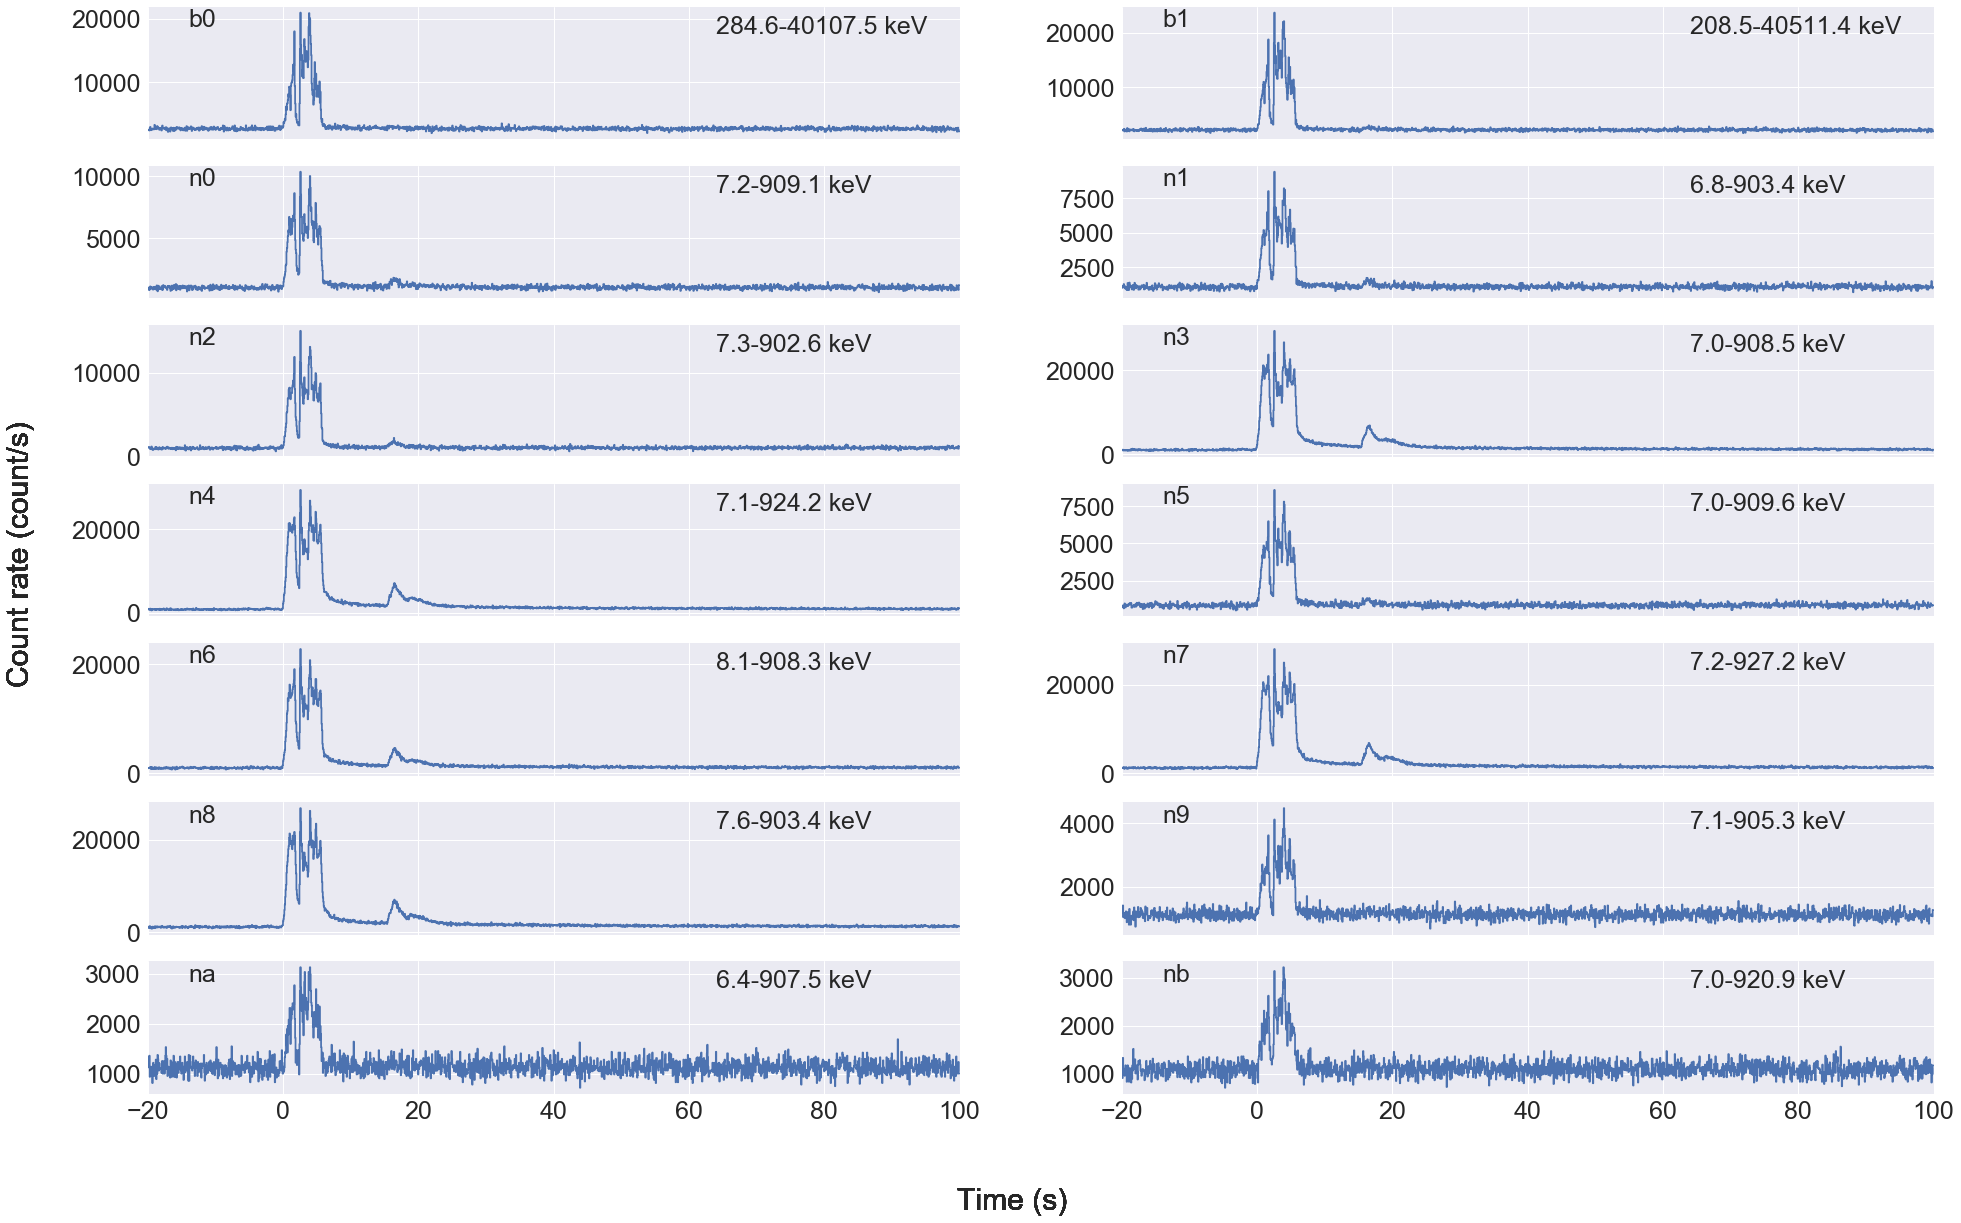

In [2]:
databasedir='/home/lang/work/GBM/burstdownload/data/'
bnname='bn190114873'
Det=['b0','b1','n0','n1','n2','n3','n4','n5',\
    'n6','n7','n8','n9','na','nb']
binwidth=0.064
viewt1=-20
viewt2=100
ch1=3
ch2=124
tbins=np.arange(viewt1,viewt2,binwidth)
fig, axes= plt.subplots(7,2,figsize=(32, 20),sharex=True,sharey=False)
for i in range(14):
    ttefile=glob(databasedir+'/2019/'+bnname+'/'+'glg_tte_'+Det[i]+'_'+bnname+'_v*.fit')
    hdu=fits.open(ttefile[0])
    trigtime=hdu['Primary'].header['TRIGTIME']
    data=hdu['EVENTS'].data
    time=data.field(0)-trigtime
    ch=data.field(1)
    #data in firt and last two channels of BGO and NaI are not used
    #ignore 0,1,2,125,126,127, notice 3-124
    goodindex=(ch>=ch1) & (ch<=ch2)  
    time=time[goodindex]
    ebound=hdu['EBOUNDS'].data
    emin=ebound.field(1)
    emin=emin[ch1:ch2+1]
    emax=ebound.field(2)
    emax=emax[ch1:ch2+1]
    histvalue, histbin =np.histogram(time,bins=tbins)
    plotrate=histvalue/binwidth
    #plotrate=bootstrap(plotrate,1)[0]
    #plotrate=np.concatenate(([plotrate[0]],plotrate))
    plotrate=jackknife_resampling(plotrate)[23]
    plotrate=np.concatenate(([plotrate[0]],[plotrate[0]],plotrate))
    axes[i//2,i%2].plot(histbin,plotrate,drawstyle='steps')
    axes[i//2,i%2].set_xlim([viewt1,viewt2])
    axes[i//2,i%2].tick_params(labelsize=25)
    axes[i//2,i%2].text(0.05,0.85,Det[i],transform=\
                            axes[i//2,i%2].transAxes,fontsize=25)
    axes[i//2,i%2].text(0.7,0.80,str(round(emin[0],1))+'-'+\
                                str(round(emax[-1],1))+' keV',\
                                transform=axes[i//2,i%2].transAxes,fontsize=25)
    fig.text(0.07, 0.5, 'Count rate (count/s)', ha='center', va='center',\
                                                 rotation='vertical',fontsize=30)
    fig.text(0.5, 0.05, 'Time (s)', ha='center', va='center',fontsize=30)
plt.show()
plt.close()

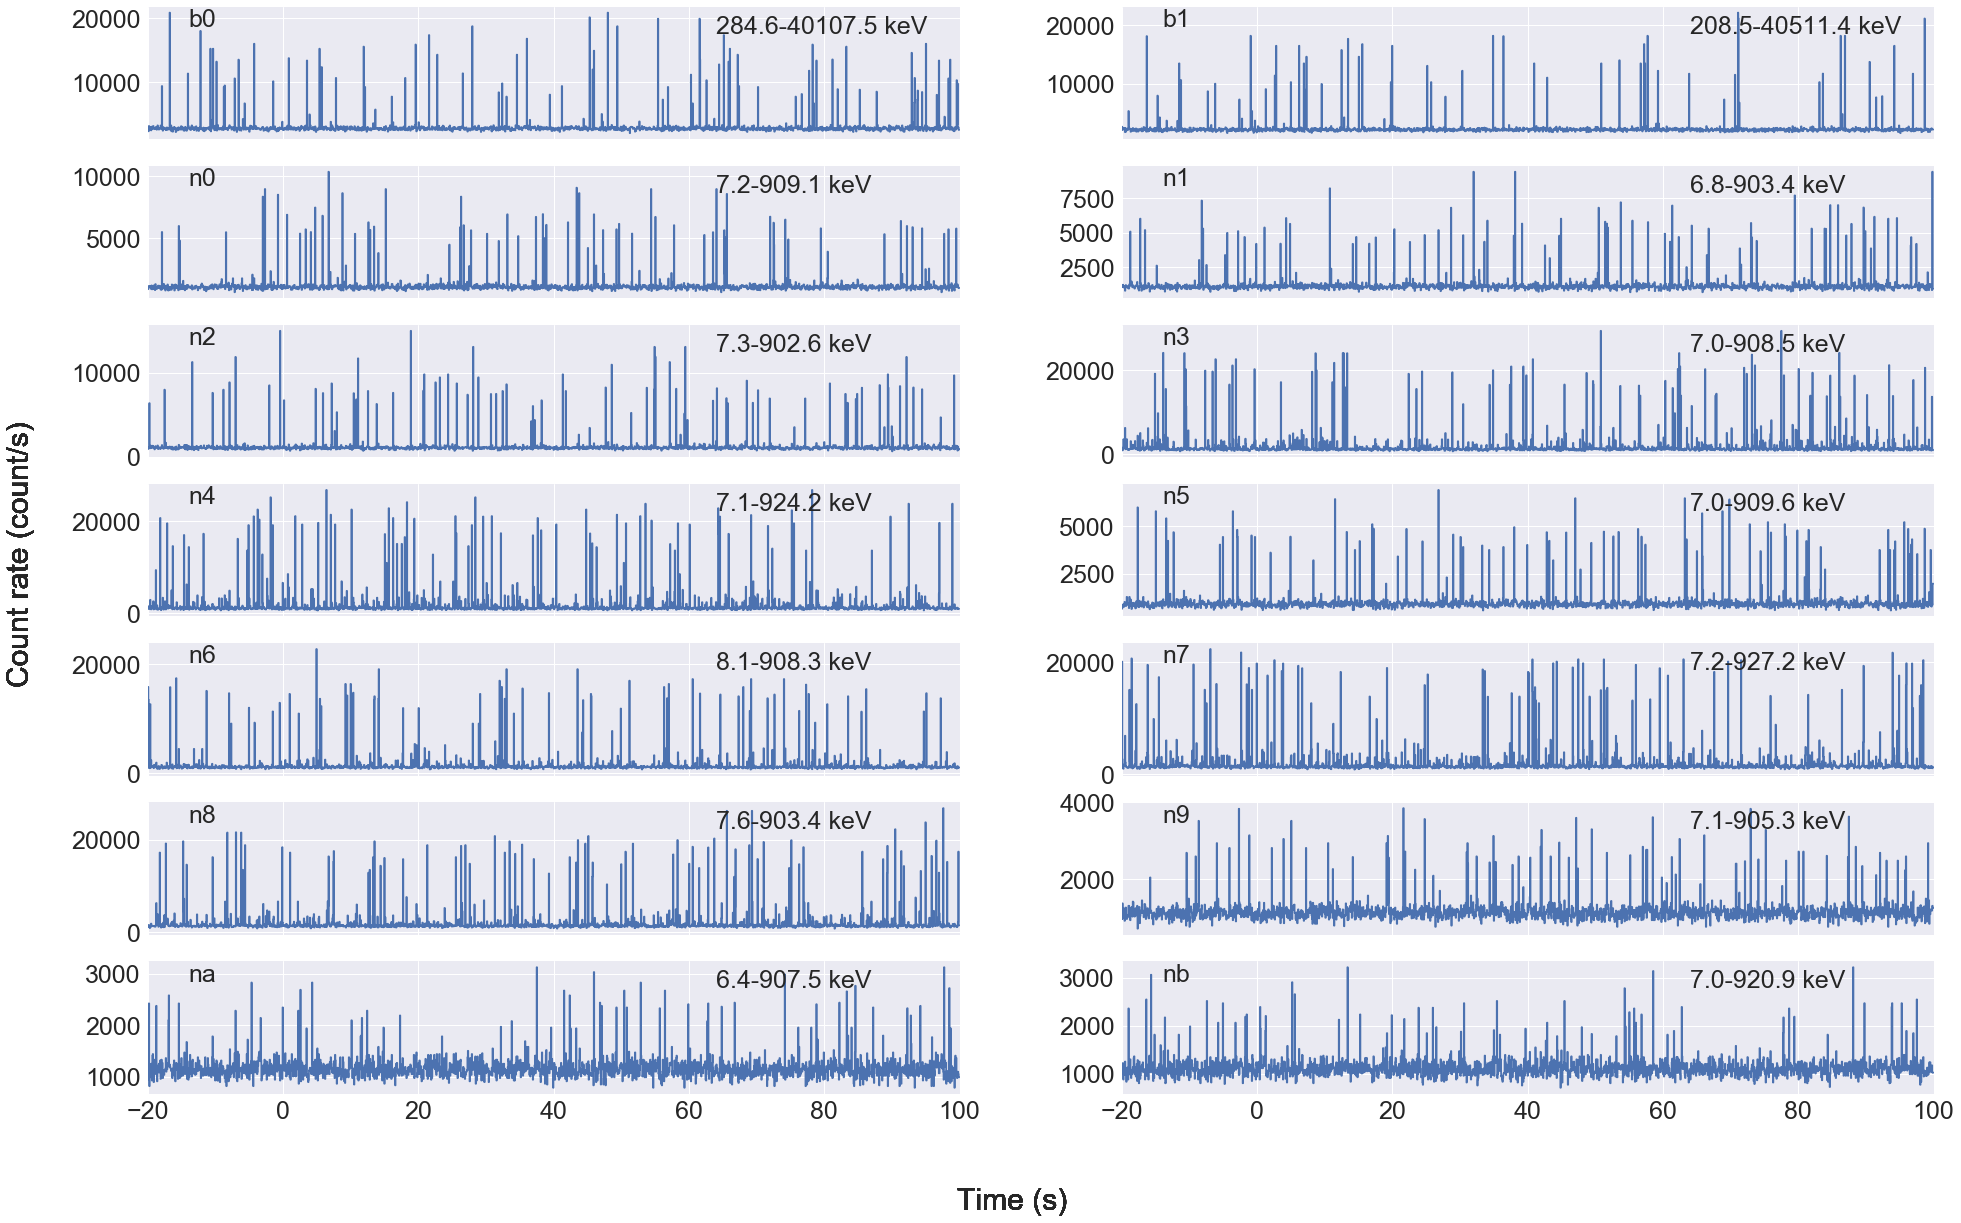

In [3]:
databasedir='/home/lang/work/GBM/burstdownload/data/'
bnname='bn190114873'
Det=['b0','b1','n0','n1','n2','n3','n4','n5',\
    'n6','n7','n8','n9','na','nb']
binwidth=0.064
viewt1=-20
viewt2=100
ch1=3
ch2=124
tbins=np.arange(viewt1,viewt2,binwidth)
fig, axes= plt.subplots(7,2,figsize=(32, 20),sharex=True,sharey=False)
for i in range(14):
    ttefile=glob(databasedir+'/2019/'+bnname+'/'+'glg_tte_'+Det[i]+'_'+bnname+'_v*.fit')
    hdu=fits.open(ttefile[0])
    trigtime=hdu['Primary'].header['TRIGTIME']
    data=hdu['EVENTS'].data
    time=data.field(0)-trigtime
    ch=data.field(1)
    #data in firt and last two channels of BGO and NaI are not used
    #ignore 0,1,2,125,126,127, notice 3-124
    goodindex=(ch>=ch1) & (ch<=ch2)  
    time=time[goodindex]
    ebound=hdu['EBOUNDS'].data
    emin=ebound.field(1)
    emin=emin[ch1:ch2+1]
    emax=ebound.field(2)
    emax=emax[ch1:ch2+1]
    histvalue, histbin =np.histogram(time,bins=tbins)
    plotrate=histvalue/binwidth
    plotrate=bootstrap(plotrate,1)[0]
    plotrate=np.concatenate(([plotrate[0]],plotrate))
    #plotrate=jackknife_resampling(plotrate)[23]
    #plotrate=np.concatenate(([plotrate[0]],[plotrate[0]],plotrate))
    axes[i//2,i%2].plot(histbin,plotrate,drawstyle='steps')
    axes[i//2,i%2].set_xlim([viewt1,viewt2])
    axes[i//2,i%2].tick_params(labelsize=25)
    axes[i//2,i%2].text(0.05,0.85,Det[i],transform=\
                            axes[i//2,i%2].transAxes,fontsize=25)
    axes[i//2,i%2].text(0.7,0.80,str(round(emin[0],1))+'-'+\
                                str(round(emax[-1],1))+' keV',\
                                transform=axes[i//2,i%2].transAxes,fontsize=25)
    fig.text(0.07, 0.5, 'Count rate (count/s)', ha='center', va='center',\
                                                 rotation='vertical',fontsize=30)
    fig.text(0.5, 0.05, 'Time (s)', ha='center', va='center',fontsize=30)
plt.show()
plt.close()

In [4]:
bootstrap(np.arange(30),1)

array([[ 1.,  3., 20.,  7., 25.,  6., 28., 15.,  1., 23.,  8., 11., 19.,
        11.,  2., 27., 21.,  5., 24., 21.,  3., 20.,  8., 17., 14.,  3.,
         3., 20., 17.,  0.]])

In [5]:
help(bootstrap)

Help on function bootstrap in module astropy.stats.funcs:

bootstrap(data, bootnum=100, samples=None, bootfunc=None)
    Performs bootstrap resampling on numpy arrays.
    
    Bootstrap resampling is used to understand confidence intervals of sample
    estimates. This function returns versions of the dataset resampled with
    replacement ("case bootstrapping"). These can all be run through a function
    or statistic to produce a distribution of values which can then be used to
    find the confidence intervals.
    
    Parameters
    ----------
    data : numpy.ndarray
        N-D array. The bootstrap resampling will be performed on the first
        index, so the first index should access the relevant information
        to be bootstrapped.
    bootnum : int, optional
        Number of bootstrap resamples
    samples : int, optional
        Number of samples in each resample. The default `None` sets samples to
        the number of datapoints
    bootfunc : function, optional
   